# Real Estate Data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv(r"E:\PYTHON\python Datasets\Linear Regression\Real estate.csv")

In [57]:
data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### EDA

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [59]:
data.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [60]:
# from  pandas_profiling import ProfileReport
# Report = ProfileReport(data)
# Report.to_file(output_file='RealEstateReport.html')

<AxesSubplot:>

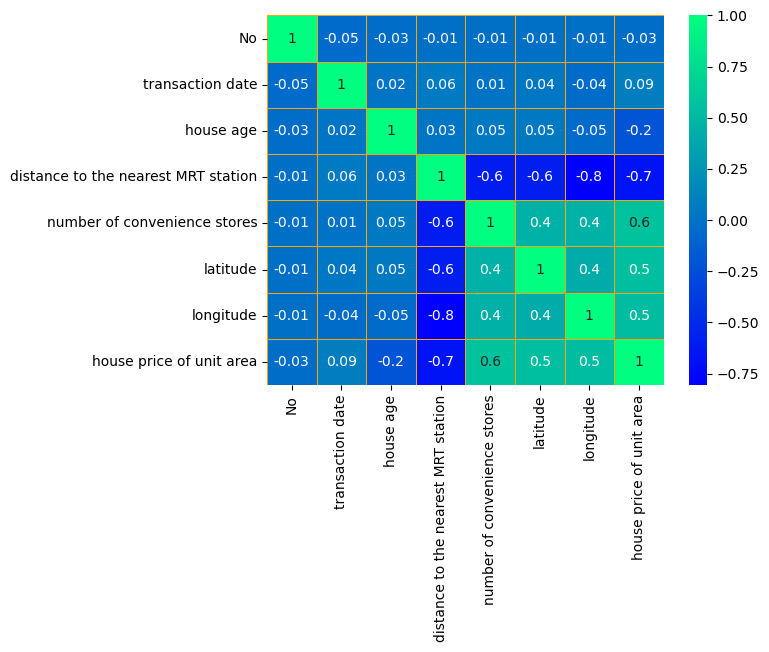

In [61]:
sns.heatmap(data.corr(),cmap='winter',annot=True,fmt='.1g',linewidths=.4,linecolor='orange')

In [62]:
#feature selection
y=data['house price of unit area']

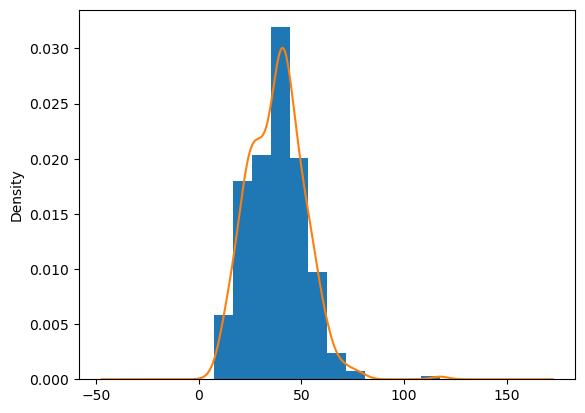

In [63]:
#Y=target variable is continous in nature
data['house price of unit area'].plot(kind='hist',density=True,bins=12,)
data['house price of unit area'].plot(kind='kde')
plt.show()

In [64]:
x=data.iloc[:,:-1]

In [65]:
x.shape,y.shape

((414, 7), (414,))

In [66]:
x.drop(columns=['No','longitude'],axis=1,inplace=True)

In [67]:
x.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude
0,2012.917,32.0,84.87882,10,24.98298
1,2012.917,19.5,306.59470,9,24.98034
2,2013.583,13.3,561.98450,5,24.98746
3,2013.500,13.3,561.98450,5,24.98746
4,2012.833,5.0,390.56840,5,24.97937


In [68]:
x.rename(columns={'transaction date':'date','house age':'house_age'},inplace=True)

In [69]:
x.head()

,date,house_age,distance to the nearest MRT station,number of convenience stores,latitude
0,2012.917,32.0,84.87882,10,24.98298
1,2012.917,19.5,306.59470,9,24.98034
2,2013.583,13.3,561.98450,5,24.98746
3,2013.500,13.3,561.98450,5,24.98746
4,2012.833,5.0,390.56840,5,24.97937


In [70]:
x['year']=x.date.astype('int')

In [71]:
x.head()

,date,house_age,distance to the nearest MRT station,number of convenience stores,latitude,year
0,2012.917,32.0,84.87882,10,24.98298,2012
1,2012.917,19.5,306.59470,9,24.98034,2012
2,2013.583,13.3,561.98450,5,24.98746,2013
3,2013.500,13.3,561.98450,5,24.98746,2013
4,2012.833,5.0,390.56840,5,24.97937,2012


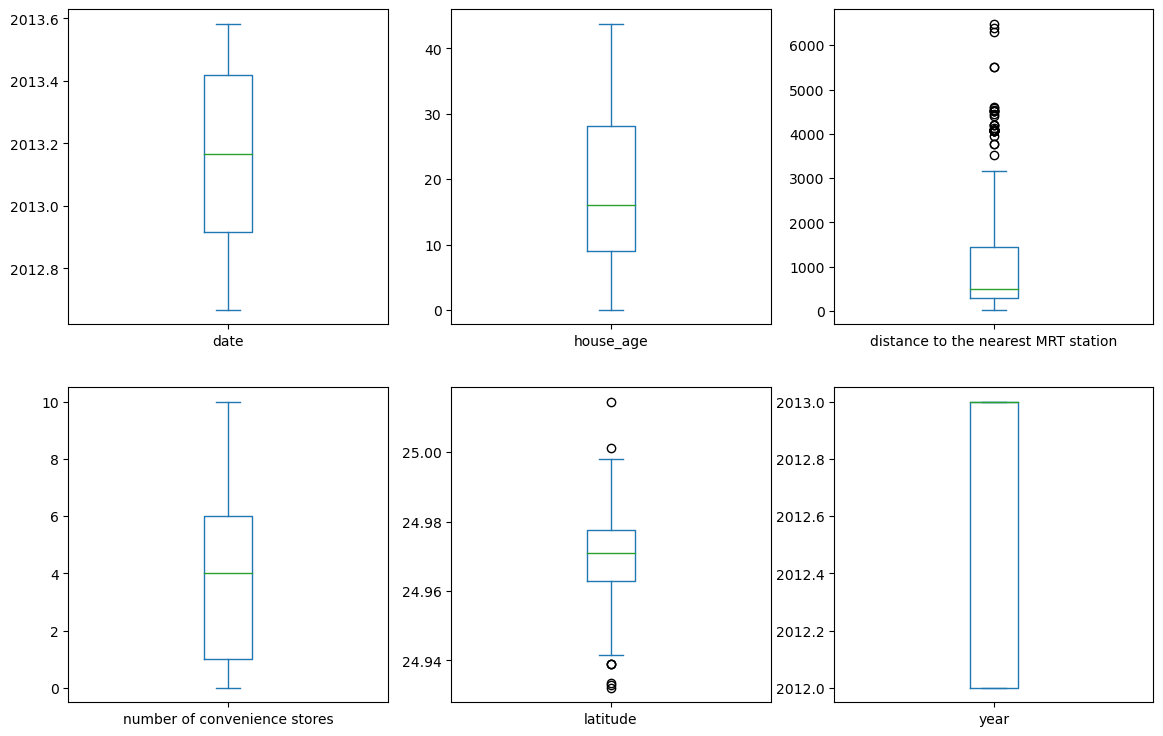

In [72]:
x.plot(kind='box',subplots=True,layout=(2,3),sharex=False,figsize=(14,9))
plt.show()

In [74]:
x.drop('date',axis=1,inplace=True)

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


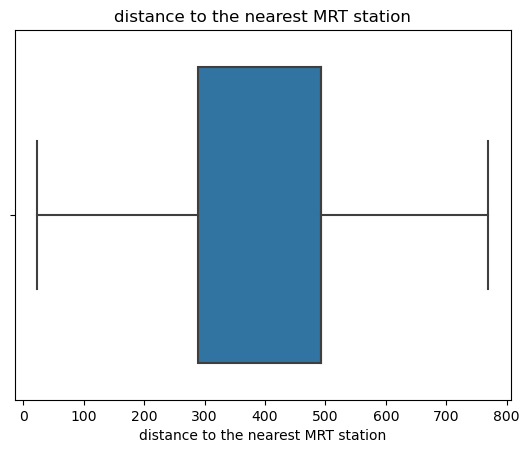

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


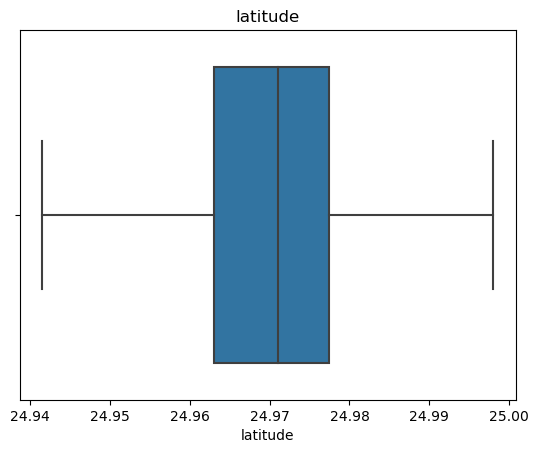

In [77]:
name='distance to the nearest MRT station'
for i in x[name]:
    q1=x[name].quantile(0.25)
    q3=x[name].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    if i > u or i <l:
        x[name]=x[name].replace(i,np.median(x[name]))
sns.boxplot(x[name])
plt.title('distance to the nearest MRT station')
plt.show()
name='latitude'
for i in x[name]:
    q1=x[name].quantile(0.25)
    q3=x[name].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    if i > u or i <l:
        x[name]=x[name].replace(i,np.median(x[name]))
sns.boxplot(x[name])
plt.title('latitude')
plt.show()

### train_test

In [78]:
from sklearn.model_selection import train_test_split

#here dataset is small so i taking 90% train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)

#hear 10% train data adding into remaining 10% test data so 20% test data
xt,x_test,yt,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [79]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((372, 5), (83, 5), (372,), (83,))

### linear regression

In [80]:
from sklearn.linear_model import LinearRegression
Real_estate=LinearRegression()
Real_estate.fit(x_train,y_train)

LinearRegression()

In [81]:
#prediting
y_pred=pd.DataFrame(Real_estate.predict(x_test))
y_test=pd.DataFrame(y_test)

### Evaluation

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.69208558012093

In [83]:
Real_estate.score(x_test,y_test)

0.69208558012093

In [84]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
print(sm.OLS(y_train,x_train).fit().summary())

                               OLS Regression Results                               
Dep. Variable:     house price of unit area   R-squared:                       0.585
Model:                                  OLS   Adj. R-squared:                  0.579
Method:                       Least Squares   F-statistic:                     103.2
Date:                      Mon, 30 Jan 2023   Prob (F-statistic):           1.09e-67
Time:                              15:23:53   Log-Likelihood:                -1341.0
No. Observations:                       372   AIC:                             2694.
Df Residuals:                           366   BIC:                             2718.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

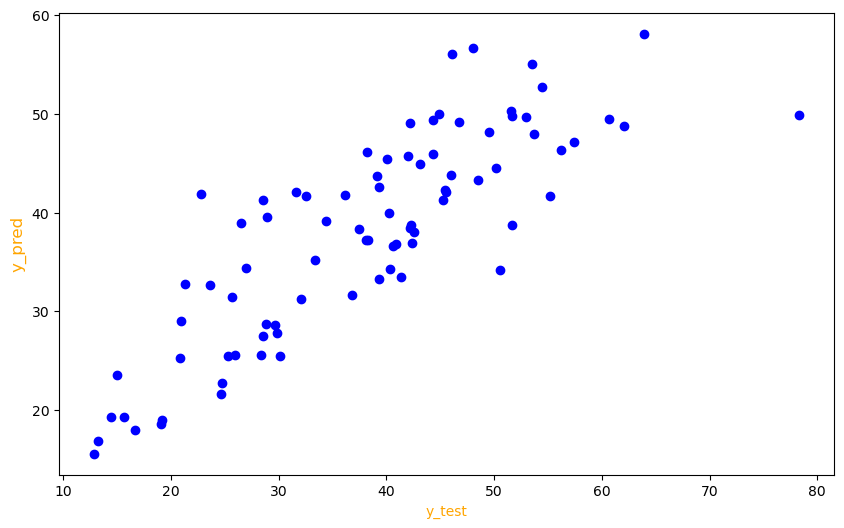

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,c='b')
plt.xlabel('y_test',c='orange',fontsize=10)
plt.ylabel('y_pred',c='orange',fontsize=12)
plt.show()